In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv('dataset.csv')


Saving dataset.csv to dataset.csv


In [ ]:

# Separate numerical and categorical columns
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns

# Descriptive statistics for numerical features
numerical_summary = df[numerical_features].describe().T
numerical_summary['median'] = df[numerical_features].median()

# Analyze frequencies for categorical features
categorical_summary = {}
for col in categorical_features:
    categorical_summary[col] = df[col].value_counts()

# Display the results
print("Descriptive Statistics for Numerical Features:")
print(numerical_summary)

print("\nFrequencies for Categorical Features:")
for col, freq in categorical_summary.items():
    print(f"\n{col}:\n{freq}")


Descriptive Statistics for Numerical Features:
             count        mean         std   min    25%    50%    75%     max  \
age        45211.0   40.936210   10.618762  18.0   33.0   39.0   48.0    95.0   
day        45211.0   15.806419    8.322476   1.0    8.0   16.0   21.0    31.0   
dur        45211.0  258.163080  257.527812   0.0  103.0  180.0  319.0  4918.0   
num_calls  45211.0    2.763841    3.098021   1.0    1.0    2.0    3.0    63.0   

           median  
age          39.0  
day          16.0  
dur         180.0  
num_calls     2.0  

Frequencies for Categorical Features:

job:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

marital:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

education

In [ ]:


# 1. Identify Missing Values
missing_values = df.isnull().sum()

# 2. Propose methods for handling missing values
# Method: Drop columns/rows with too many missing values or fill them with mean, median, mode
# Check percentage of missing data
missing_percent = (missing_values / len(df)) * 100

# 3. Detect outliers for numerical features using the IQR method
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numerical features
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values outside 1.5 * IQR range
outliers = (df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))

# Count outliers for each numerical feature
outliers_summary = outliers.sum()

# Display results
print("Missing Values in the Dataset:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percent)
print("\nOutliers Detected in Numerical Features:\n", outliers_summary)


Missing Values in the Dataset:
 age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

Percentage of Missing Data:
 age               0.0
job               0.0
marital           0.0
education_qual    0.0
call_type         0.0
day               0.0
mon               0.0
dur               0.0
num_calls         0.0
prev_outcome      0.0
y                 0.0
dtype: float64

Outliers Detected in Numerical Features:
 age           487
day             0
dur          3235
num_calls    3064
dtype: int64


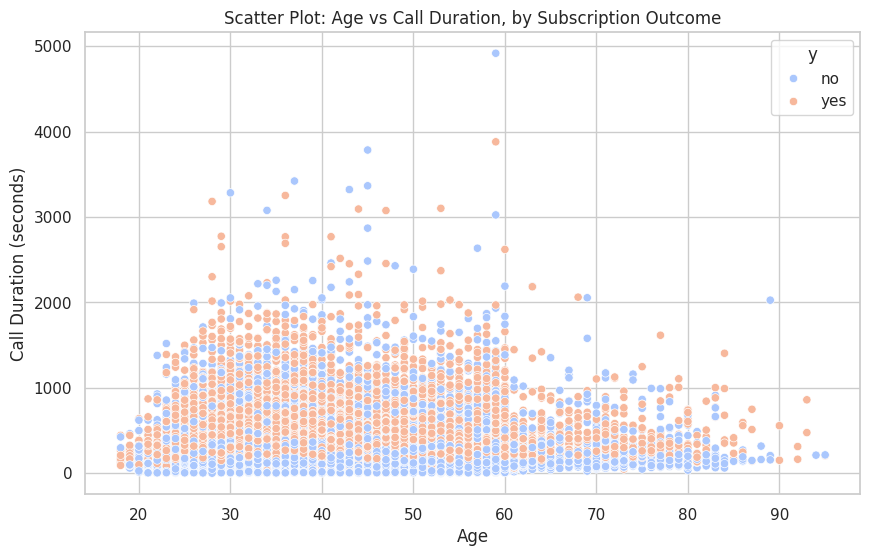

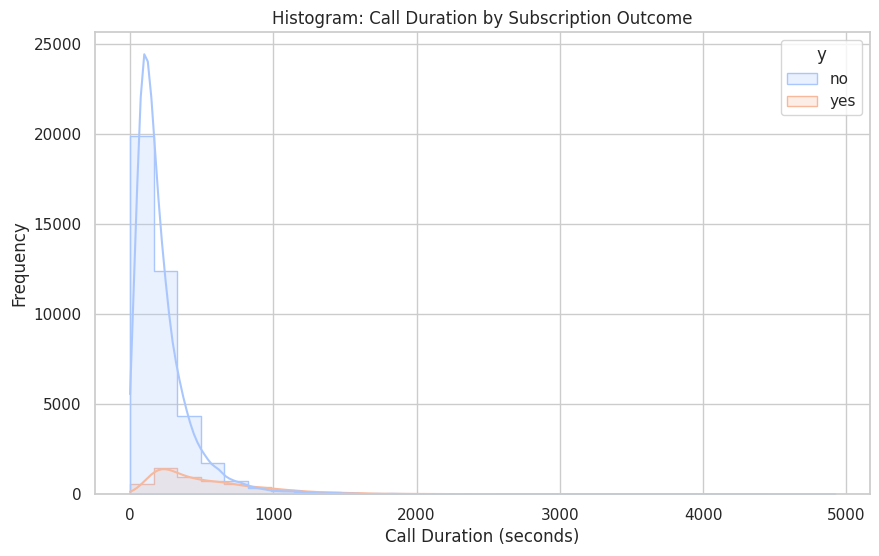

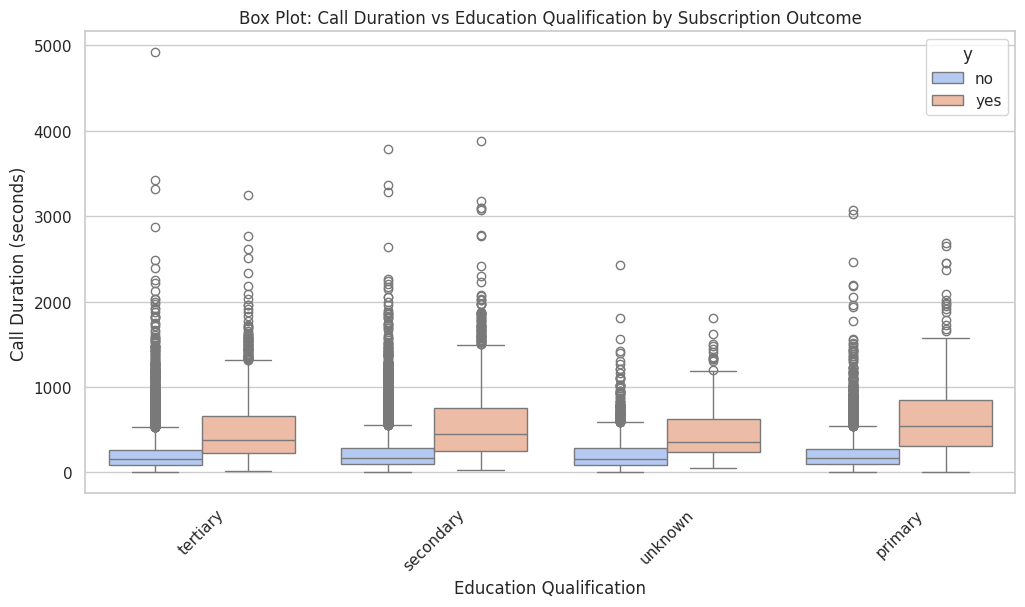

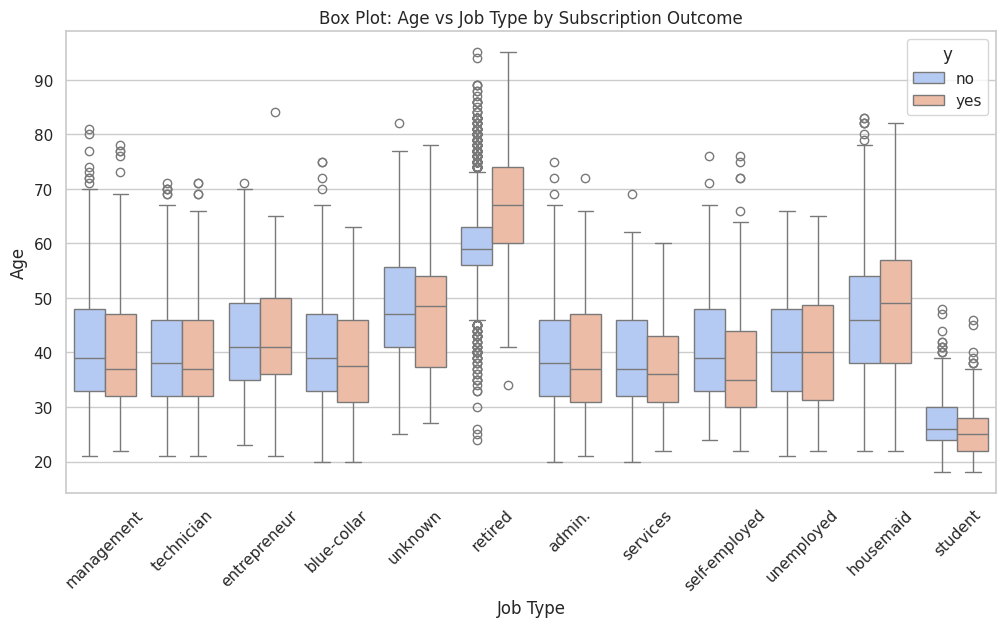

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Scatter plot of Age vs. Call Duration, color-coded by the target variable 'y'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='dur', hue='y', palette='coolwarm')
plt.title('Scatter Plot: Age vs Call Duration, by Subscription Outcome')
plt.xlabel('Age')
plt.ylabel('Call Duration (seconds)')
plt.show()

# Histogram of Call Duration by Subscription Outcome
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='dur', hue='y', element="step", kde=True, palette='coolwarm', bins=30)
plt.title('Histogram: Call Duration by Subscription Outcome')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Box plot of Call Duration vs Education Qualification, color-coded by the target variable 'y'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='education_qual', y='dur', hue='y', palette='coolwarm')
plt.title('Box Plot: Call Duration vs Education Qualification by Subscription Outcome')
plt.xlabel('Education Qualification')
plt.ylabel('Call Duration (seconds)')
plt.xticks(rotation=45)
plt.show()

# Box plot of Age vs Job Type, color-coded by the target variable 'y'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='job', y='age', hue='y', palette='coolwarm')
plt.title('Box Plot: Age vs Job Type by Subscription Outcome')
plt.xlabel('Job Type')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Prepare features (X) and target (y)
X = df.drop(columns=['y'])  # Features: drop the target column 'y'
y = df['y']  # Target: conversion (yes/no)

# Encode categorical variables (job, marital, education_qual, call_type, prev_outcome)
X_encoded = pd.get_dummies(X, drop_first=True)

# Encode the target variable (yes=1, no=0)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Check the proportion of target variable in training and testing sets
train_class_distribution = pd.Series(y_train).value_counts(normalize=True)
test_class_distribution = pd.Series(y_test).value_counts(normalize=True)

print("Training set class distribution:")
print(train_class_distribution)
print("Testing set class distribution:")
print(test_class_distribution)


Training set class distribution:
0    0.883018
1    0.116982
Name: proportion, dtype: float64
Testing set class distribution:
0    0.883003
1    0.116997
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression

# Instantiate and train the Logistic Regression model
logreg = LogisticRegression()  # Create a LogisticRegression object
logreg.fit(X_train, y_train)   # Fit the model to the training data

# Ensure that Logistic Regression has been fit on the training data
# Extract feature names and coefficients
logreg_coef = pd.DataFrame({
    'Feature': X_train.columns,                # Column names from the training set
    'Coefficient': logreg.coef_.flatten()      # Flatten the coefficients array
})

# Calculate the absolute value of coefficients to understand feature importance by magnitude
logreg_coef['Abs_Coefficient'] = np.abs(logreg_coef['Coefficient'])

# Sort the features by absolute value of coefficients in descending order
logreg_coef = logreg_coef.sort_values(by='Abs_Coefficient', ascending=False)

# Print or display the feature importance
print(logreg_coef)

# Optionally: Display the top 10 most important features
top_features = logreg_coef.head(10)
print(top_features)

                     Feature  Coefficient  Abs_Coefficient
34      prev_outcome_success     2.147296         2.147296
21         call_type_unknown    -1.235784         1.235784
30                   mon_nov    -1.058124         1.058124
28                   mon_mar     0.930501         0.930501
26                   mon_jul    -0.895170         0.895170
29                   mon_may    -0.869291         0.869291
8                job_retired     0.803933         0.803933
31                   mon_oct     0.793795         0.793795
4            job_blue-collar    -0.680881         0.680881
25                   mon_jan    -0.630514         0.630514
32                   mon_sep     0.621197         0.621197
15           marital_married    -0.513197         0.513197
22                   mon_aug    -0.441578         0.441578
33        prev_outcome_other    -0.421040         0.421040
11               job_student     0.413685         0.413685
27                   mon_jun     0.408341         0.4083

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                     Feature  Importance
2                        dur    0.322099
0                        age    0.133736
1                        day    0.122361
34      prev_outcome_success    0.062827
3                  num_calls    0.050439
35      prev_outcome_unknown    0.020399
17  education_qual_secondary    0.015599
21         call_type_unknown    0.015448
15           marital_married    0.014219
27                   mon_jun    0.014084
12            job_technician    0.013954
28                   mon_mar    0.013933
29                   mon_may    0.013119
18   education_qual_tertiary    0.013023
31                   mon_oct    0.012943
7             job_management    0.012547
22                   mon_aug    0.011448
26                   mon_jul    0.011049
16            marital_single    0.011026
4            job_blue-collar    0.010476
32                   mon_sep    0.010224
24                   mon_feb    0.009546
20       call_type_telephone    0.009424
30              

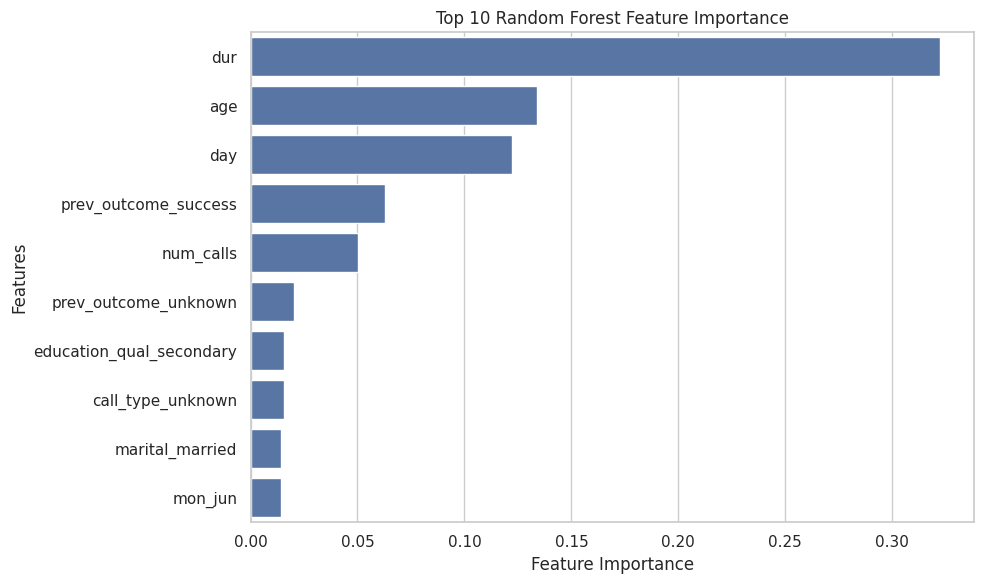

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier # import the RandomForestClassifier model

# Create and train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42) # create an instance of the model
rf.fit(X_train, y_train) # fit the model to the training data

# Extract feature importance values from the trained Random Forest model
rf_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,                # Column names from the training set
    'Importance': rf.feature_importances_      # Feature importances from Random Forest
})

# Sort features by importance in descending order
rf_feature_importance = rf_feature_importance.sort_values(by='Importance', ascending=False)

# Print the sorted feature importance DataFrame
print(rf_feature_importance)

# Plot feature importance for the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance.head(10))  # Only top 10 features
plt.title('Top 10 Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predictions on the test set
# Replace 'rf_model' with 'rf' to use the trained Random Forest model
y_pred = rf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the classification report
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9037
Precision: 0.6349
Recall: 0.4159
F1-Score: 0.5026

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.63      0.42      0.50      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # number of trees
    'max_depth': [10, 20, 30, None],            # max depth of each tree
    'min_samples_split': [2, 5, 10],            # min samples to split a node
    'min_samples_leaf': [1, 2, 4],              # min samples to be at a leaf node
    'max_features': ['sqrt', 'log2'],           # number of features to consider at each split
    'bootstrap': [True, False],                 # whether to use bootstrap samples
    'class_weight': [None, 'balanced'],         # handling class imbalance
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=100,  # number of parameter settings sampled
    scoring='accuracy',  # optimize for accuracy
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,  # use all available processors
    random_state=42
)

# Fit RandomizedSearchCV to find the best hyperparameters
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", random_search.best_params_)

# Evaluate the tuned model
best_rf = random_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Calculate and print performance metrics
tuned_accuracy = accuracy_score(y_test, y_pred)
tuned_precision = precision_score(y_test, y_pred)
tuned_recall = recall_score(y_test, y_pred)
tuned_f1 = f1_score(y_test, y_pred)

print("Tuned Accuracy:", tuned_accuracy)
print("Tuned Precision:", tuned_precision)
print("Tuned Recall:", tuned_recall)
print("Tuned F1-Score:", tuned_f1)

# Print the classification report
print("\nClassification Report (Tuned):")
print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters:  {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'class_weight': None, 'bootstrap': False}
Tuned Accuracy: 0.9037929890523057
Tuned Precision: 0.6424242424242425
Tuned Recall: 0.4007561436672968
Tuned F1-Score: 0.4935972060535506

Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.64      0.40      0.49      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043

